## 0. Read Dataset
1.  [4 pts] read your csv file into 2-dimenson list (a_list).
2. If your data needs preprocssing (Label Encoding & Normalization), please do that.
3.  [8 pts] Follow the same process in HW 1 and create X_train, X_test, Y_train, Y_test.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.preprocessing import StandardScaler

In [4]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [5]:
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier

In [6]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [7]:
from sklearn.ensemble import RandomForestClassifier

In [8]:
df = pd.read_csv("csv_result-heart-statlog.csv")
df.columns

Index(['id', 'age', 'sex', 'chest', 'resting_blood_pressure',
       'serum_cholestoral', 'fasting_blood_sugar',
       'resting_electrocardiographic_results', 'maximum_heart_rate_achieved',
       'exercise_induced_angina', 'oldpeak', 'slope',
       'number_of_major_vessels', 'thal', 'class'],
      dtype='object')

In [9]:
df.drop("id", inplace = True, axis =1)

In [10]:
df.head()

,age,sex,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal,class
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,present
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,absent
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,present
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,absent
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,absent


In [11]:
df.shape

(270, 14)

**Check if NULL Values are Present**

In [12]:
df.isna().sum()

age                                     0
sex                                     0
chest                                   0
resting_blood_pressure                  0
serum_cholestoral                       0
fasting_blood_sugar                     0
resting_electrocardiographic_results    0
maximum_heart_rate_achieved             0
exercise_induced_angina                 0
oldpeak                                 0
slope                                   0
number_of_major_vessels                 0
thal                                    0
class                                   0
dtype: int64

In [13]:
for col in df:
   a = (df[col] == "?").sum()
   print(a)

0
0
0
0
0
0
0
0
0
0
0
0
0
0


**Encode the Output Class**

In [14]:
df["class"] = np.where(df["class"] == "present", 1, 0)

**Train Test Split**

In [15]:
X = df.iloc[: , 0:13]
y = df.iloc[: , 13]
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.3, random_state = 123)

**Standardization**

In [16]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 1. Running Neural Network

In [17]:
clf = MLPClassifier(hidden_layer_sizes=(30,))
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print("accuracy = ", accuracy_score(y_test, predictions))

accuracy =  0.8395061728395061


/home/manishakarim/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [18]:
confusion_matrix(y_test,predictions)

array([[41,  4],
       [ 9, 27]])

**1) [5 pts] experiments with different number of hidden layer/node**
    hidden_layer_sizes=(30,) means one hidden layer with 30 hidden nodes
    hidden_layer_sizes=(15,15,15) means 3 hidden layers with 15 hidden nodes each.
    run neural network with

> a. one hidden layer with 4 different hidden nodes (on your own choice).
> Draw a graph showing the relationship between accuracy and number of nodes.


In [19]:
nodes = [40,50,60,80]
acc = []

for i in range(len(nodes)):
    clf = MLPClassifier(hidden_layer_sizes=(nodes[i],))
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    accuracy = (accuracy_score(y_test, predictions))
    acc.append(accuracy)

/home/manishakarim/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/manishakarim/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/manishakarim/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/manishakarim/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


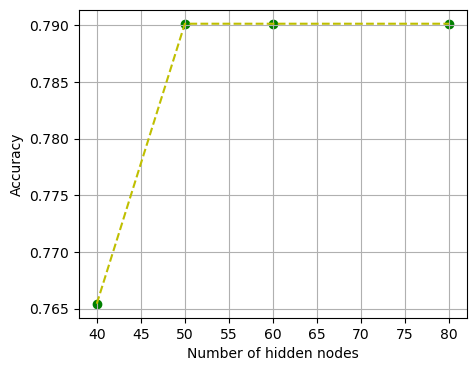

In [20]:
plt.figure(figsize = [5,4])
plt.plot(nodes, acc, ls = "dashed", color = "y")
plt.scatter(nodes, acc,color = "g")


plt.xlabel("Number of hidden nodes")
plt.ylabel("Accuracy")
plt.grid()

> b. three hidden layers with 4 different hidden node configurations. (on your own choice)
Draw a graph showing the relationship between accuracy and number of nodes.


In [21]:
nodes = [[40,30,20],[50,30,10], [20,15,5], [80,60,40]]
acc = []

for i in range(len(nodes)):
    clf = MLPClassifier(hidden_layer_sizes= nodes[i])
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    accuracy = (accuracy_score(y_test, predictions))
    acc.append(accuracy)

/home/manishakarim/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/manishakarim/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/manishakarim/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/manishakarim/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


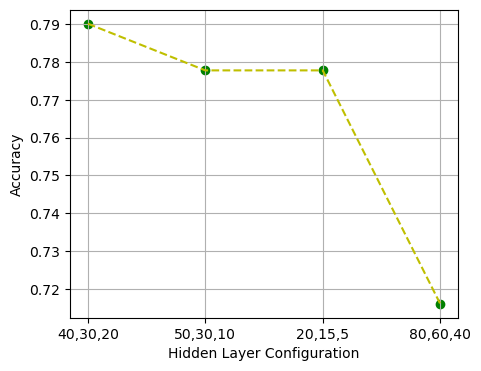

In [22]:
layer = ["40,30,20","50,30,10", "20,15,5", "80,60,40"]

plt.figure(figsize = [5,4])
plt.plot(layer, acc, ls = "dashed", color = "y")
plt.scatter(layer, acc,color = "g")


plt.xlabel("Hidden Layer Configuration")
plt.ylabel("Accuracy")
plt.grid()

**2) [3 pts] run neural network by changing 'activation function' {‘identity’, ‘logistic’, ‘tanh’, ‘relu’},
Compare the results of these activation functions by plotting.**

The "identity" activation function outperformed the other activation functions.


In [23]:
activation_function = ["identity", "logistic", "tanh", "relu"]
acc = []

for i in range(len(activation_function)):
        clf = MLPClassifier(hidden_layer_sizes=(30,), activation =  activation_function[i])
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = (accuracy_score(y_test, predictions))
        acc.append(accuracy)

/home/manishakarim/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/manishakarim/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/manishakarim/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


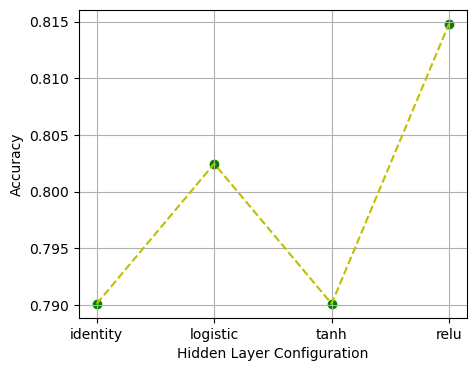

In [24]:
plt.figure(figsize = [5,4])
plt.plot(activation_function, acc, ls = "dashed", color = "y")
plt.scatter(activation_function, acc,color = "g")


plt.xlabel("Hidden Layer Configuration")
plt.ylabel("Accuracy")
plt.grid()

**3) [3 pts] run neural network with different 'momentum' values of (0, 0.1, 0.5, 0.9). Explain the
results of using these parameter values.**

> The gradient descent optimization process is boosted by momentum, which enables the search to develop inertia in a direction inside the search space, resist noisy gradient oscillations, and coast across search space flat patches.
>
> The smoother and more resilient the moving average is to gradient changes, the greater the magnitude of the momentum term. Momentum has a range of 0 to 1, where a greater number corresponds to a more stable optimization process. This is also evident in our plot, where the most accurate scores are those with the most momentum.



In [25]:
momentum = [0, 0.1, 0.5, 0.9]
acc = []

for i in range(len(momentum)):
        clf = MLPClassifier(hidden_layer_sizes=(30,), solver = "sgd",momentum =  momentum[i])
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = (accuracy_score(y_test, predictions))
        acc.append(accuracy)

/home/manishakarim/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/manishakarim/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/manishakarim/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/manishakarim/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


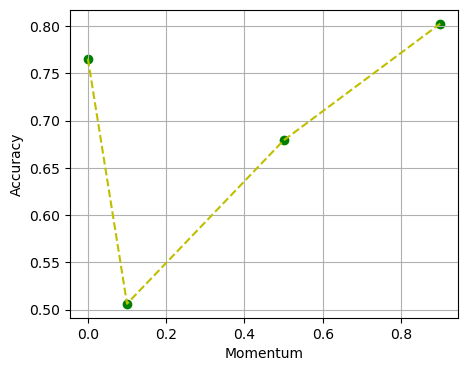

In [26]:
plt.figure(figsize = [5,4])
plt.plot(momentum, acc, ls = "dashed", color = "y")
plt.scatter(momentum, acc,color = "g")


plt.xlabel("Momentum")
plt.ylabel("Accuracy")
plt.grid()

**4) [3 pts] run neural network with 3 different learning rate (on your choice).
You have to change 'learning_rate' parameter and (sometimes) 'learning_rate_init' parameter.
Compare the results of using these parameter values.**

> In machine learning, the learning rate is a hyperparameter that regulates the step size at which a neural network's weights are updated during training. The rate at which a model learns is largely dependent on its learning rate. It can't be set too high or too low. The highest accuracy is found at learning rate 0.002 for this problem.


In [27]:
lr = [0.001, 0.002, 0.05]
acc = []

for i in range(len(lr)):
        clf = MLPClassifier(hidden_layer_sizes=(30,), learning_rate_init = lr[i], solver = "sgd")
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = (accuracy_score(y_test, predictions))
        acc.append(accuracy)

/home/manishakarim/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/manishakarim/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/manishakarim/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


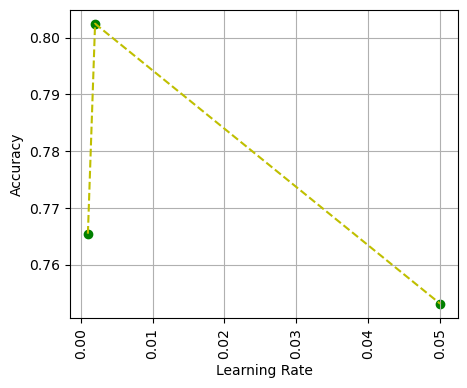

In [28]:
plt.figure(figsize = [5,4])
plt.plot(lr, acc, ls = "dashed", color = "y")
plt.scatter(lr, acc,color = "g")


plt.xlabel("Learning Rate")
plt.ylabel("Accuracy")

plt.xticks(rotation = 90)
plt.grid()

## 2. Running IBL (K nearest neighbor)

In [29]:
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
pred_prob = clf.predict_proba(X_test)


In [30]:
print("accuracy = ", accuracy)

accuracy =  0.8148148148148148


**1) [3 pts] run the algorithm by changing the value of n_neighbors (default=5) to 1, 5, 9, 11 and 13,
respectively. Draw a graph showing the relationship between accuracy and n_neighbors and find
optimal ‘n_neighbors’.**


In [31]:
n = [1, 5, 9, 11, 13]
acc = []

for i in range(len(n)):
    clf = KNeighborsClassifier(n_neighbors=n[i])
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)

    accuracy = accuracy_score(y_test, predictions)
    pred_prob = clf.predict_proba(X_test)
    acc.append(accuracy)


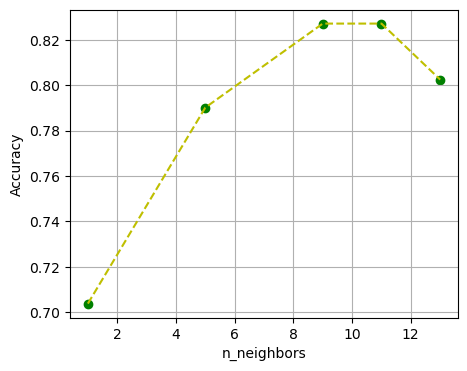

In [32]:
plt.figure(figsize = [5,4])
plt.plot(n, acc, ls = "dashed", color = "y")
plt.scatter(n, acc,color = "g")


plt.xlabel("n_neighbors")
plt.ylabel("Accuracy")
plt.grid()

**2) [3 pts] run the algorithm by changing the value of weights to ‘uniform’ and ‘distance’,
respectively. Explain the differences in performance.**

> A modified form of k nearest neighbors is called weighted kNN.  The underlying principle of weighted KNN is to assign greater weight to adjacent points and less weight to distant points. In this case, the weighted KNN works better than the traditional KNN.


In [33]:
weights = ["uniform",  "distance"]
acc = []

for i in range(len(weights)):
    clf = KNeighborsClassifier(weights = weights[i], n_neighbors = 30)
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)

    accuracy = accuracy_score(y_test, predictions)
    pred_prob = clf.predict_proba(X_test)
    acc.append(accuracy)


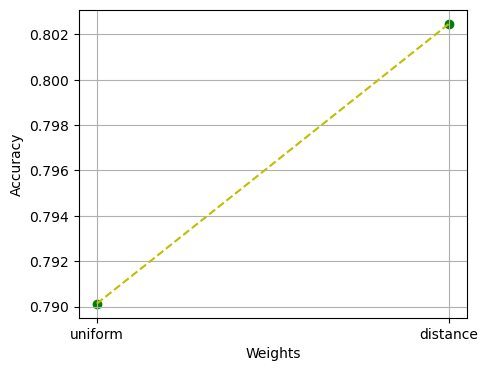

In [34]:
plt.figure(figsize = [5,4])
plt.plot(weights, acc, ls = "dashed", color = "y")
plt.scatter(weights, acc,color = "g")


plt.xlabel("Weights")
plt.ylabel("Accuracy")
plt.grid()

**3) [3 pts] run the algorithm by changing the value of p to 1 (Manhattan) and 2 (Euclidean). Explain
the differences in performance.**

>The shortest distance between two points is represented by the Euclidean distance. The Manhattan distance is the sum of the absolute differences between points in all dimensions.


In [35]:
p = [1, 2]
acc = []

for i in range(len(p)):
    clf = KNeighborsClassifier(p=p[i])
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)

    a1ccuracy = accuracy_score(y_test, predictions)
    pred_prob = clf.predict_proba(X_test)
    acc.append(accuracy)


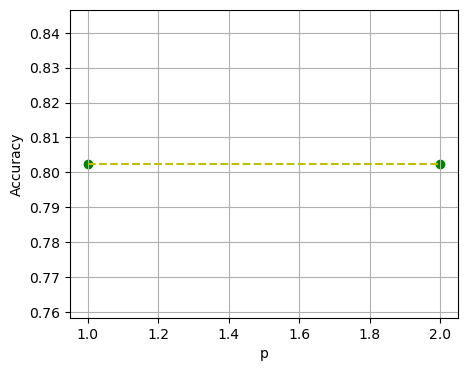

In [36]:
plt.figure(figsize = [5,4])
plt.plot(p, acc, ls = "dashed", color = "y")
plt.scatter(p, acc,color = "g")


plt.xlabel("p")
plt.ylabel("Accuracy")
plt.grid()

## 3. build ensemble model

In [37]:
clf = AdaBoostClassifier()
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

pred_prob = clf.predict_proba(X_test)
accuracy = accuracy_score(y_test, predictions)
    
print("accuracy = ", accuracy)

accuracy =  0.7160493827160493


**1) [3 pts] run by changing n_estimators = 3, 5, 7, 10, 50. Plot your results and explain the effect
of the n_estimators.**

> The number of base estimators we wish to employ in our dataset is denoted by n_estimators.  Given the limited size of the dataset, n_estimator = 3 performed better than the others.


In [38]:
n = [3, 5, 7, 10, 50]
acc = []
for i in range(len(n)):

    clf = AdaBoostClassifier(n_estimators = n[i] )
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)

    accuracy = accuracy_score(y_test, predictions)
    acc.append(accuracy)


In [39]:
acc

[0.8148148148148148,
 0.7407407407407407,
 0.7407407407407407,
 0.8024691358024691,
 0.7160493827160493]

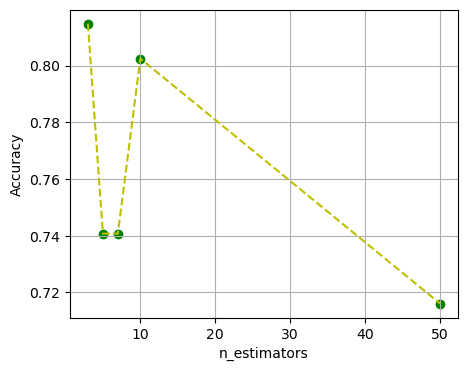

In [40]:
plt.figure(figsize = [5,4])
plt.plot(n, acc, ls = "dashed", color = "y")
plt.scatter(n, acc,color = "g")


plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.grid()

**2) [3 pts] compare the best performance of AdaBoostClassifier with that of IBL. Which is better ?
Explain the results.**

> At their best, AdaBoost and KNN performed quite similarly, with KNN marginally surpassing AdaBoost. Noisy data could be the cause of this. KNN is resistant to it, whereas AdaBoost is susceptible.


## 4. Running Random Forest

In [41]:
clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

pred_prob = clf.predict_proba(X_test)
accuracy = accuracy_score(y_test, predictions)
    
print("accuracy = ", accuracy)

accuracy =  0.8148148148148148


**1) [3 pts] Run by changing n_estimators = 3, 5, 7, 10, 50, 100 respectively. Plot a graph between
accuracy and n_estimators and explain the effect of the n_estimators.**

> The number of trees in the model's forest is specified by the n_estimators parameter.  The accuracy is highest when n_estimators = 50.


In [42]:
n = [3, 5, 7, 10, 50, 100]
acc = []
for i in range(len(n)):

    clf = RandomForestClassifier(n_estimators=n[i], max_depth=2, random_state=0)
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)

    accuracy = accuracy_score(y_test, predictions)
    acc.append(accuracy)


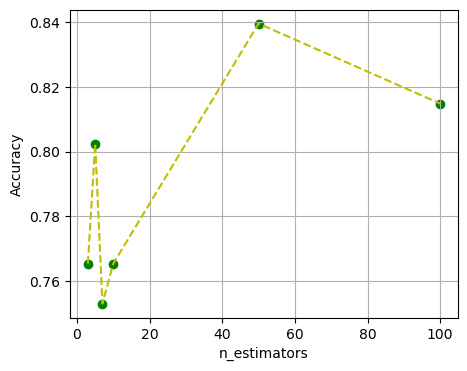

In [43]:
plt.figure(figsize = [5,4])
plt.plot(n, acc, ls = "dashed", color = "y")
plt.scatter(n, acc,color = "g")


plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.grid()

**2) [3 pts] oob_score is a value that is used to estimate the size of test error in random forest.
Choose the best n_estimators from q. 1), and run the model by changing oob_score = True/False.
respectively. Show the accuracies of each run, and explain the effect of the oob_score.**

>OOb score is a measure of how accurate the random forest classifier is generalizing unseen data. An oob score of 0.84 indicates that this model predicts the target variable accurately 84%.


In [44]:
oob = [True, False]
acc = []

for i in range(len(oob)):

    clf = RandomForestClassifier(n_estimators = 50, max_depth=2, oob_score = oob[i], random_state=0)
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)

    accuracy = accuracy_score(y_test, predictions)
    acc.append(accuracy)


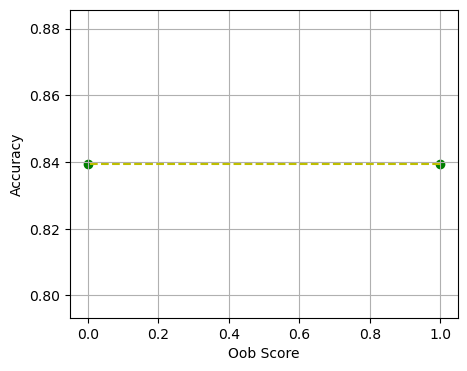

In [45]:
plt.figure(figsize = [5,4])
plt.plot(oob, acc, ls = "dashed", color = "y")
plt.scatter(oob, acc,color = "g")


plt.xlabel("Oob Score")
plt.ylabel("Accuracy")
plt.grid()

**3) [3 pts] Choose the optimal n_estimators from q. 1), and run the model by changing
max_features = “auto”, “sqrt”, “log2”, respectively. Show the accuracies of each run, and explain
the effect of the max_features.**

>The amount of features to consider in order to determine the optimal split is found by max_features. Max_features for "sqrt" equals sqrt(n_features). When log2 is used, max features equals log2(n_features).

In [46]:
features = ["sqrt", "log2"] 

#Changed in version 1.1: The default of max_features changed from "auto" to "sqrt". 
#Ref: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

acc = []

for i in range(len(features)):

    clf = RandomForestClassifier(n_estimators = 50, max_depth=2, max_features = features[i],  random_state=0)
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)

    accuracy = accuracy_score(y_test, predictions)
    acc.append(accuracy)


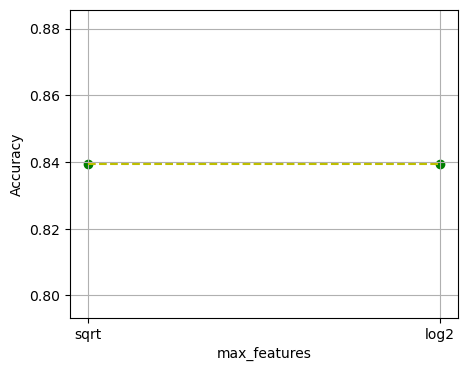

In [47]:
plt.figure(figsize = [5,4])
plt.plot(features, acc, ls = "dashed", color = "y")
plt.scatter(features, acc,color = "g")


plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.grid()

**4) [3 pts] Choose the optimal n_estimators from q. 1), and run the model by changing “max_depth”
to your own choice (small int number). Show the effect of max_depth parameter.**

In [48]:
n = [1,2 , 3, 5, 7]
acc = []
for i in range(len(n)):

    clf = RandomForestClassifier(n_estimators = 50, max_depth=n[i], random_state=0)
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)

    accuracy = accuracy_score(y_test, predictions)
    acc.append(accuracy)


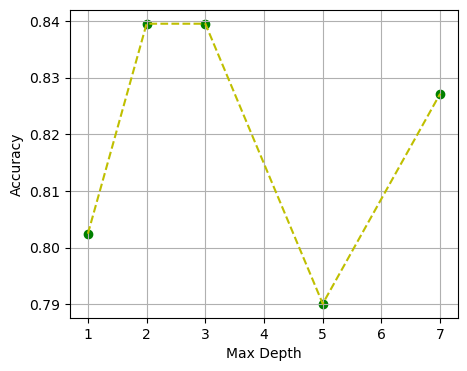

In [49]:
plt.figure(figsize = [5,4])
plt.plot(n, acc, ls = "dashed", color = "y")
plt.scatter(n, acc,color = "g")


plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.grid()